# A Deep Neural Network Regressor 2

My first stab at this task will be to implement an **DNN Regressor** model.

In [1]:
%matplotlib inline

#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# df = pd.read_csv('data_new/train.csv',header=None)
# print df.info()
# df.head()

In [3]:
# Data load function
def load_data(filename):
    data   = pd.read_csv(filename,header=None)
    x_data = data.iloc[:,:-1].values
    y_data = data.iloc[:,-1].values
#     print 'X shape:', x_data.shape
#     print 'Y shape:', y_data.shape
    return x_data,y_data

In [4]:
filename = 'data_new/train.csv'
x_train,y_train=load_data(filename)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.01,random_state=32)

## Regressor Model

In [5]:
# Keras Imports
# Keras Imports
from keras.models import Model, load_model
from keras.layers import Input, Dense, Lambda
from keras.layers import Flatten, Reshape, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras import regularizers
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [6]:
# Parameters
ndim = x_train.shape[1]
L1   = 256
L2   = 256
L3   = 256
L4   = 32

In [7]:
# Build DNN
def build_model():
    x = Input(shape=(ndim,),name='Input')
    h = Dense(L1,activation='relu',name='L1')(x)
    h = BatchNormalization()(h)
    h = Dense(L2,activation='relu',kernel_regularizer=regularizers.l2(0.01),name='L2')(h)
    h = BatchNormalization()(h)
    h = Dense(L3,activation='relu',kernel_regularizer=regularizers.l2(0.01),name='L3')(h)
    h = BatchNormalization()(h)
    h = Dense(L4,activation='relu',name='L4')(h)
    h = BatchNormalization()(h)
    y = Dense(1,activation='linear',name='Output')(h)
    model = Model(x,y)
    return model

# from keras import regularizers
# model.add(Dense(64, input_dim=64,
#                 kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))

In [8]:
# Compile Model
model = build_model()
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 6720)              0         
_________________________________________________________________
L1 (Dense)                   (None, 256)               1720576   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
L2 (Dense)                   (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
L3 (Dense)                   (None, 256)               65792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
__________

In [9]:
# Train Model
log = model.fit(x_train, y_train,
              batch_size=10,
              epochs=30,
              shuffle=True,
              validation_data=(x_valid,y_valid))

Train on 1960 samples, validate on 20 samples
Epoch 1/30
1960/1960 [==============================] - 5s - loss: 6576.0678 - val_loss: 5476.6331
Epoch 2/30
1960/1960 [==============================] - 4s - loss: 5642.9881 - val_loss: 4541.8840
Epoch 3/30
1960/1960 [==============================] - 4s - loss: 4271.6183 - val_loss: 3167.1356
Epoch 4/30
1960/1960 [==============================] - 4s - loss: 2679.5234 - val_loss: 1476.8613
Epoch 5/30
1960/1960 [==============================] - 4s - loss: 1359.0193 - val_loss: 607.5898
Epoch 6/30
1960/1960 [==============================] - 4s - loss: 557.2455 - val_loss: 203.1198
Epoch 7/30
1960/1960 [==============================] - 4s - loss: 205.6615 - val_loss: 41.2658
Epoch 8/30
1960/1960 [==============================] - 4s - loss: 105.1366 - val_loss: 16.4131
Epoch 9/30
1960/1960 [==============================] - 4s - loss: 73.9407 - val_loss: 13.1952
Epoch 10/30
1960/1960 [==============================] - 4s - loss: 76.7258 

In [10]:
# model.save('model.h5')

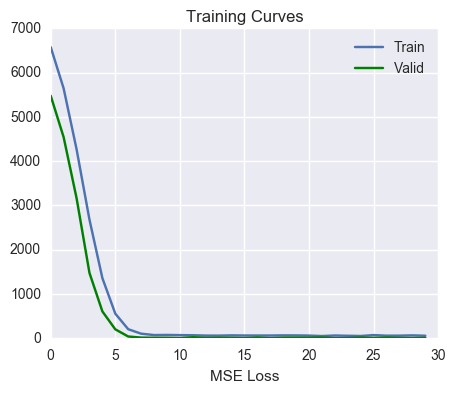

In [11]:
# Training Curves
plt.figure(figsize=(5,4))
plt.plot(log.epoch,log.history['loss'])
plt.plot(log.epoch,log.history['val_loss'],'g')
plt.title('Training Curves')
plt.xlabel('Epochs')
plt.xlabel('MSE Loss')
plt.legend(['Train','Valid'])

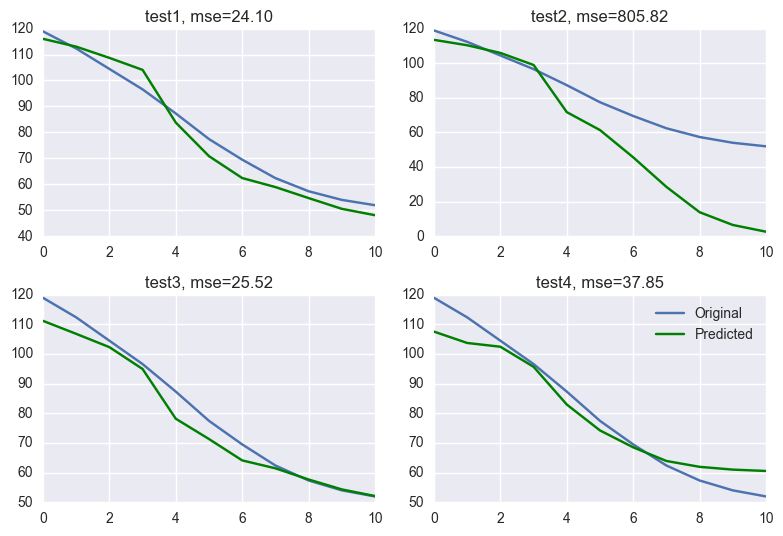

In [12]:
# Generate Predictions for Test Set
for i in range(4):
    fname = 'data_new/test{}.csv'.format(i+1) 
    x_test,y_test=load_data(fname)
    y_predict = model.predict(x_test)
    loss = model.evaluate(x_test,y_test,verbose=0)
    
    plt.subplot(221+i)
    plt.plot(y_test)
    plt.plot(y_predict,'g')
    header = '{0}, mse={1:.02f}'.format(fname[9:-4],loss)
    plt.title(header)
    
    oname = 'data_new/ypred{}.csv'.format(i+1)
    tname = 'data_new/ytest{}.csv'.format(i+1)
    np.savetxt(oname,y_predict,delimiter=',')
    np.savetxt(tname,y_test,delimiter=',')
    
plt.legend(['Original','Predicted'],loc=1)
plt.tight_layout()

----